# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, SimpleRNN, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from keras.optimizers import SGD
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from keras.regularizers import l2
from sklearn.linear_model import Ridge
import os

# **Load data**

**1. Load data from AAPL.csv**

In [ ]:
#Read file .csv
AAPL_data = pd.read_csv("../data/AAPL_data.csv", decimal='.')
#Set format for decimal number
pd.set_option('display.float_format', '{:.10f}'.format)

print(AAPL_data.head())

         Date         Open         High          Low        Close  \
0  02/12/2002 0.2839289900 0.2874999940 0.2680360080 0.2710709870   
1  03/12/2002 0.2714290020 0.2739290000 0.2696430090 0.2707140150   
2  04/12/2002 0.2710709870 0.2712500100 0.2589290140 0.2673209910   
3  05/12/2002 0.2683930100 0.2692860070 0.2594639960 0.2612499890   
4  06/12/2002 0.2616069910 0.2712500100 0.2592859860 0.2669639890   

     Adj Close     Volume  
0 0.2286611200  398742400  
1 0.2283600570  227869600  
2 0.2254979310  325757600  
3 0.2203767000  243398400  
4 0.2251967040  245358400  


**2. Load data from GDP.csv**

In [ ]:
#Read file .csv
GDP = pd.read_csv("../data/GDP.csv")

#Change format of float number
pd.options.display.float_format = '{:.0f}'.format

print(GDP.head())

                  Country Name Country Code           Indicator Name  \
0                        Aruba          ABW  GDP (constant 2015 US$)   
1  Africa Eastern and Southern          AFE  GDP (constant 2015 US$)   
2                  Afghanistan          AFG  GDP (constant 2015 US$)   
3   Africa Western and Central          AFW  GDP (constant 2015 US$)   
4                       Angola          AGO  GDP (constant 2015 US$)   

   Indicator Code         1960         1961         1962         1963  \
0  NY.GDP.MKTP.KD          NaN          NaN          NaN          NaN   
1  NY.GDP.MKTP.KD 152801000000 153504000000 165582000000 174882000000   
2  NY.GDP.MKTP.KD          NaN          NaN          NaN          NaN   
3  NY.GDP.MKTP.KD 107776000000 109795000000 113866000000 122002000000   
4  NY.GDP.MKTP.KD          NaN          NaN          NaN          NaN   

          1964         1965  ...         2014         2015         2016  \
0          NaN          NaN  ...   2981500673   29629

**3. Load data from CPI.csv**

In [ ]:
#Read file .csv
CPI = pd.read_csv("../data/CPI.csv")

print("\n",CPI.head())


    Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0  2002  178  178  178  179  180  180  180  180  181  181  182  182
1  2003  183  184  184  183  183  183  184  184  185  185  185  186
2  2004  186  187  187  187  188  189  189  189  190  191  192  192
3  2005  192  192  193  194  194  194  195  196  199  199  198  198
4  2006  199  199  200  201  201  202  203  204  203  202  202  203


# **Descriptive statistics of the data**

**1. Dataset AAPL**

---



In [ ]:
#Print all columns in AAPL_data
print(AAPL_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


***Attribute "Date"***




In [ ]:
#Print the first 50 rows of data from the "Date" column
print(AAPL_data["Date"].unique()[:50])

['02/12/2002' '03/12/2002' '04/12/2002' '05/12/2002' '06/12/2002'
 '09/12/2002' '10/12/2002' '11/12/2002' '12/12/2002' '13/12/2002'
 '16/12/2002' '17/12/2002' '18/12/2002' '19/12/2002' '20/12/2002'
 '23/12/2002' '24/12/2002' '26/12/2002' '27/12/2002' '30/12/2002'
 '31/12/2002' '02/01/2003' '03/01/2003' '06/01/2003' '07/01/2003'
 '08/01/2003' '09/01/2003' '10/01/2003' '13/01/2003' '14/01/2003'
 '15/01/2003' '16/01/2003' '17/01/2003' '21/01/2003' '22/01/2003'
 '23/01/2003' '24/01/2003' '27/01/2003' '28/01/2003' '29/01/2003'
 '30/01/2003' '31/01/2003' '03/02/2003' '04/02/2003' '05/02/2003'
 '06/02/2003' '07/02/2003' '10/02/2003' '11/02/2003' '12/02/2003']


***Attribute "Open"***

[0.28392899 0.271429   0.27107099 0.26839301 0.26160699 0.26678601
 0.26339302 0.27321401 0.27696401 0.27035701 0.26446399 0.26517901
 0.26428601 0.259464   0.25517899 0.252857   0.25785699 0.25749999
 0.25553599 0.25142899 0.25       0.25642899 0.26410699 0.26035699
 0.261071   0.26607099 0.262321   0.26053599 0.25375    0.25999999
 0.249643   0.250893   0.25428599 0.244286   0.259821   0.26750001
 0.25339299 0.257321   0.25803599 0.26267901 0.25464299 0.25892901
 0.254821   0.26089299 0.26910701 0.26464301 0.26535699 0.26214299
 0.26767901 0.26017901]


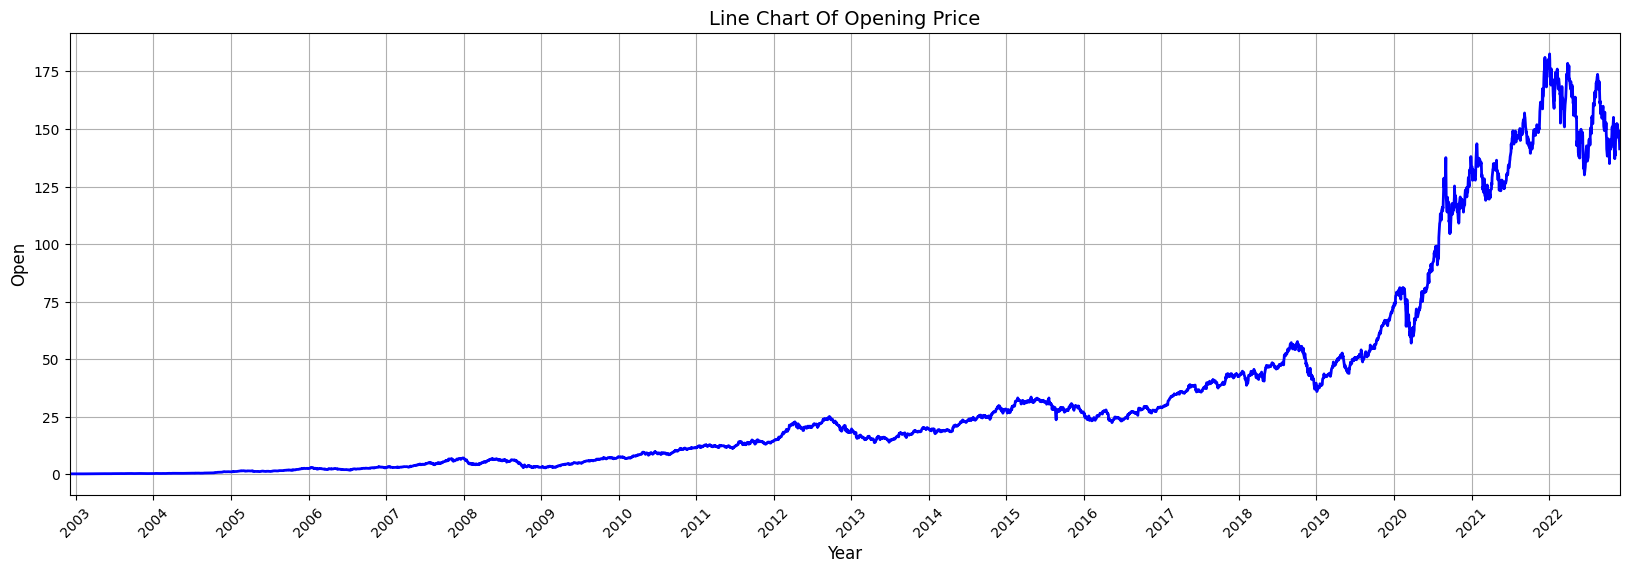

In [ ]:
#Print the first 50 rows of data from the "Open" column
print(AAPL_data["Open"].unique()[:50])

'''PLOT'''
#Change format of attribute "Date"
AAPL_data['Date'] = pd.to_datetime(AAPL_data['Date'], format='%d/%m/%Y')

#Plot line chart
plt.figure(figsize=(20,6))
plt.plot(AAPL_data['Date'], AAPL_data['Open'], linestyle='-', color='b', linewidth=2)

#Set label
plt.title('Line Chart Of Opening Price', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Open', fontsize=12)

#Set limit for x
plt.xlim(AAPL_data['Date'].min(), AAPL_data['Date'].max())

#Adjust the display of the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  #Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  #Format by month

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

***Attribute "High"***

[0.28749999 0.273929   0.27125001 0.26928601 0.26696399 0.275893
 0.27660701 0.277679   0.27053601 0.26964301 0.26535699 0.26642901
 0.25999999 0.259821   0.25839299 0.26446399 0.25678599 0.25267899
 0.25642899 0.26660699 0.274643   0.26785698 0.26267901 0.26464301
 0.26607099 0.26249999 0.26357099 0.257321   0.25428599 0.25892901
 0.262321   0.26910701 0.26625001 0.26160699 0.26053599 0.26071399
 0.26017901 0.26124999 0.26142901 0.26285699 0.27321401 0.26714301
 0.268929   0.26839301 0.26821399 0.26946399 0.27071401 0.26428601
 0.26196399 0.25874999]


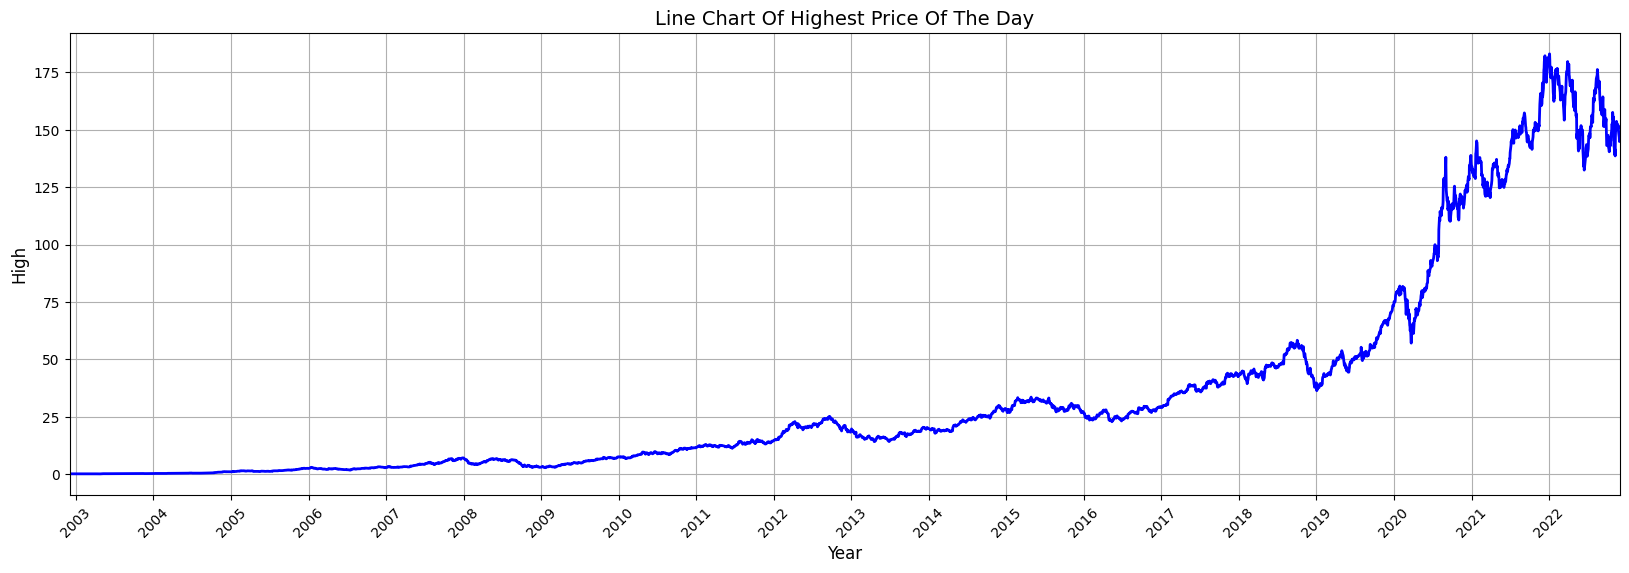

In [ ]:
#Print the first 50 rows of data from the "High" column
print(AAPL_data["High"].unique()[:50])

'''PLOT'''
#Change format of attribute "High"
AAPL_data['Date'] = pd.to_datetime(AAPL_data['Date'], format='%d/%m/%Y')

#Plot line chart
plt.figure(figsize=(20,6))
plt.plot(AAPL_data['Date'], AAPL_data['High'], linestyle='-', color='b', linewidth=2)

#Set label
plt.title('Line Chart Of Highest Price Of The Day', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('High', fontsize=12)

#Set limit for x
plt.xlim(AAPL_data['Date'].min(), AAPL_data['Date'].max())

#Adjust the display of the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  #Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  #Format by month

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

***Attribute "Low"***

[0.26803601 0.26964301 0.25892901 0.259464   0.25928599 0.26196399
 0.26303601 0.26928601 0.26160699 0.26089299 0.26178601 0.25178599
 0.246071   0.252143   0.255357   0.25499999 0.25017899 0.247143
 0.249107   0.25624999 0.26053599 0.26571399 0.25839299 0.25785699
 0.25874999 0.25642899 0.25464299 0.25375    0.25142899 0.25
 0.246429   0.242143   0.24375001 0.252857   0.25517899 0.250893
 0.25553599 0.25392899 0.25125    0.25107101 0.253571   0.254821
 0.25428599 0.26285699 0.26214299 0.26267901 0.26035699 0.258571
 0.25910699 0.26374999]


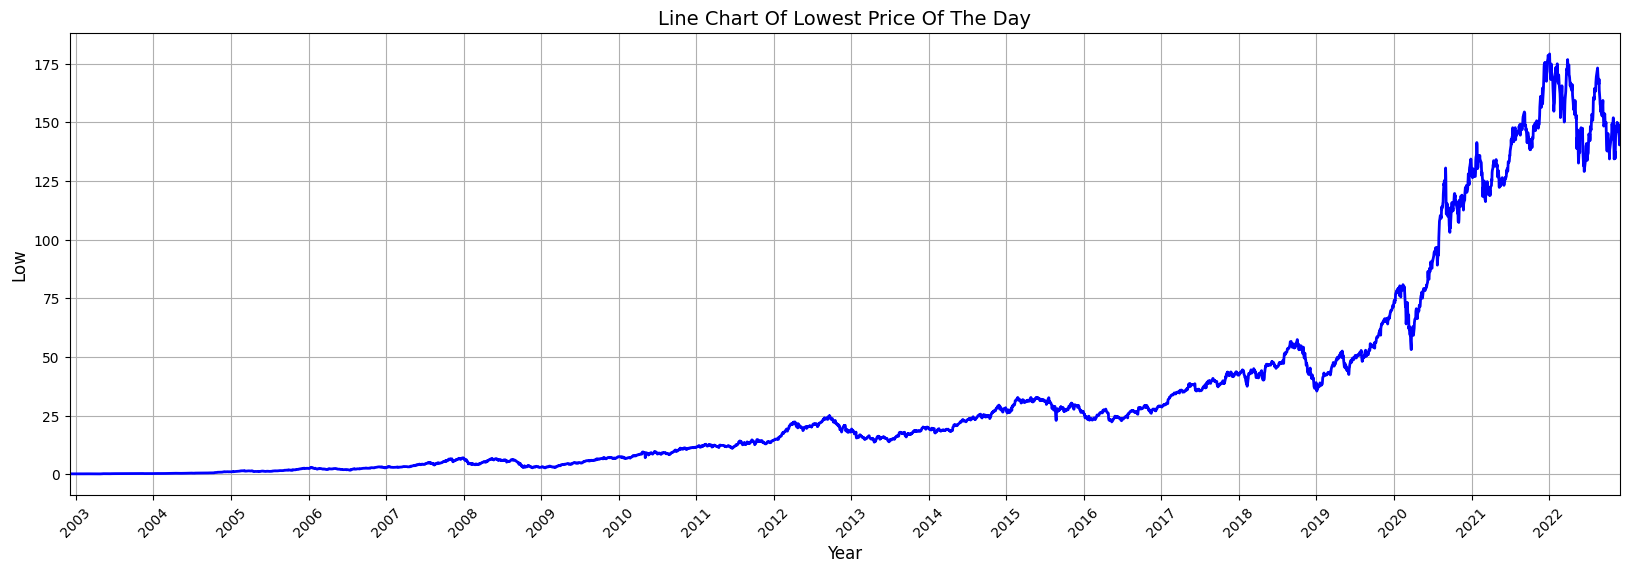

In [ ]:
#Print the first 50 rows of data from the "Low" column
print(AAPL_data["Low"].unique()[:50])

'''PLOT'''
#Change format of attribute "Low"
AAPL_data['Date'] = pd.to_datetime(AAPL_data['Date'], format='%d/%m/%Y')

#Plot line chart
plt.figure(figsize=(20,6))
plt.plot(AAPL_data['Date'], AAPL_data['Low'], linestyle='-', color='b', linewidth=2)

#Set label
plt.title('Line Chart Of Lowest Price Of The Day', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Low', fontsize=12)

#Set limit for x
plt.xlim(AAPL_data['Date'].min(), AAPL_data['Date'].max())

#Adjust the display of the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  #Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  #Format by month

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

***Attribute "Close"***

[0.27107099 0.27071401 0.26732099 0.26124999 0.26696399 0.26339302
 0.27285701 0.27660701 0.27125001 0.26410699 0.26517901 0.26928601
 0.26017901 0.253571   0.2525     0.25874999 0.25642899 0.25714299
 0.25107101 0.25125    0.25589299 0.26428601 0.26607099 0.259821
 0.26214299 0.26285699 0.26089299 0.25767899 0.261071   0.25178599
 0.250357   0.247857   0.25303599 0.246429   0.252321   0.26035699
 0.26660699 0.255714   0.26178601 0.26071399 0.25803599 0.25267899
 0.25624999 0.256964   0.25964299 0.26196399 0.272679   0.26374999
 0.26785698 0.26321399]


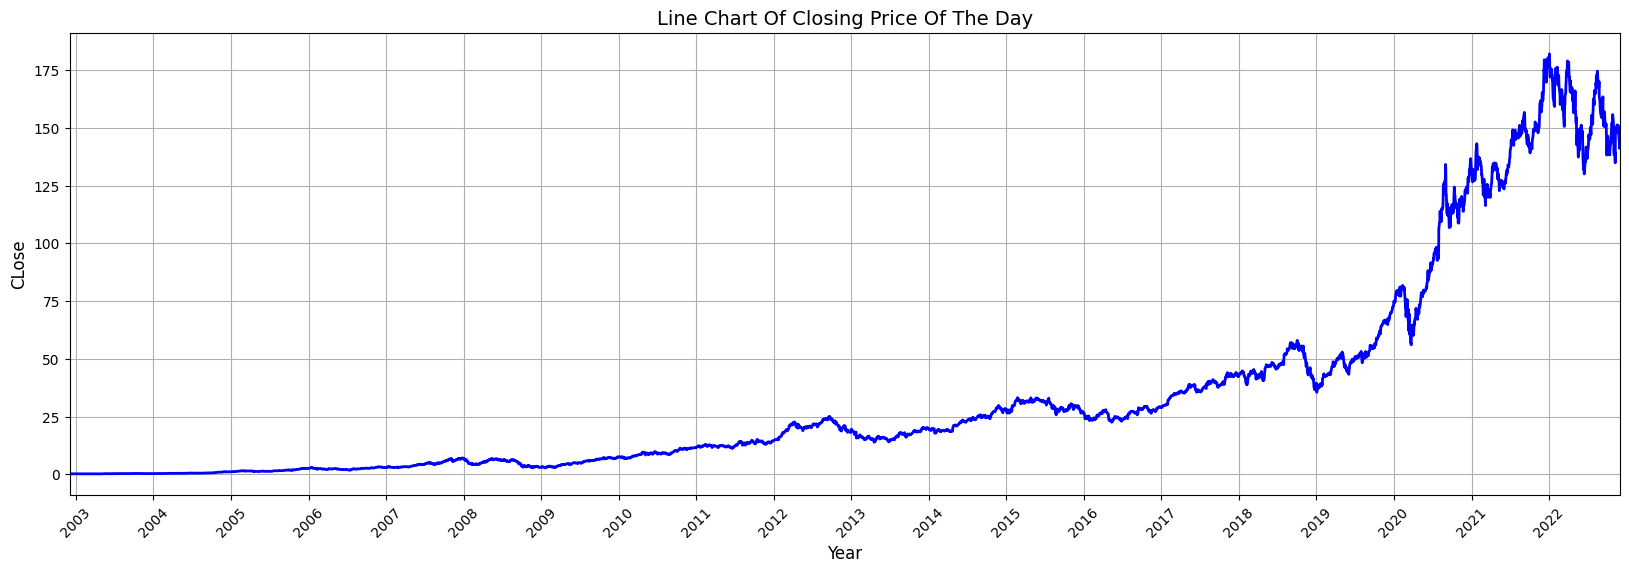

In [ ]:
#Print the first 50 rows of data from the "Close" column
print(AAPL_data["Close"].unique()[:50])

'''PLOT'''
#Change format of attribute "Close"
AAPL_data['Date'] = pd.to_datetime(AAPL_data['Date'], format='%d/%m/%Y')

#Plot line chart
plt.figure(figsize=(20,6))
plt.plot(AAPL_data['Date'], AAPL_data['Close'], linestyle='-', color='b', linewidth=2)

#Set label
plt.title('Line Chart Of Closing Price Of The Day', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CLose', fontsize=12)

#Set limit for x
plt.xlim(AAPL_data['Date'].min(), AAPL_data['Date'].max())

#Adjust the display of the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  #Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  #Format by month

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

***Attribute "Adj Close"***

[0.22866112 0.22836006 0.22549793 0.2203767  0.2251967  0.22218444
 0.23016776 0.23333101 0.22881214 0.22278662 0.22369103 0.22715542
 0.2194733  0.21389914 0.21299568 0.21826784 0.2163099  0.21691227
 0.21179023 0.2119412  0.21585783 0.22293773 0.22444345 0.21917123
 0.22112998 0.22173227 0.22007558 0.21736434 0.22022566 0.2123934
 0.21118796 0.20907907 0.21344778 0.20787451 0.21284467 0.21962345
 0.22489563 0.21570686 0.22082885 0.2199246  0.21766548 0.2131467
 0.216159   0.21676128 0.21902111 0.22097896 0.23001757 0.22248556
 0.22595006 0.22203347]


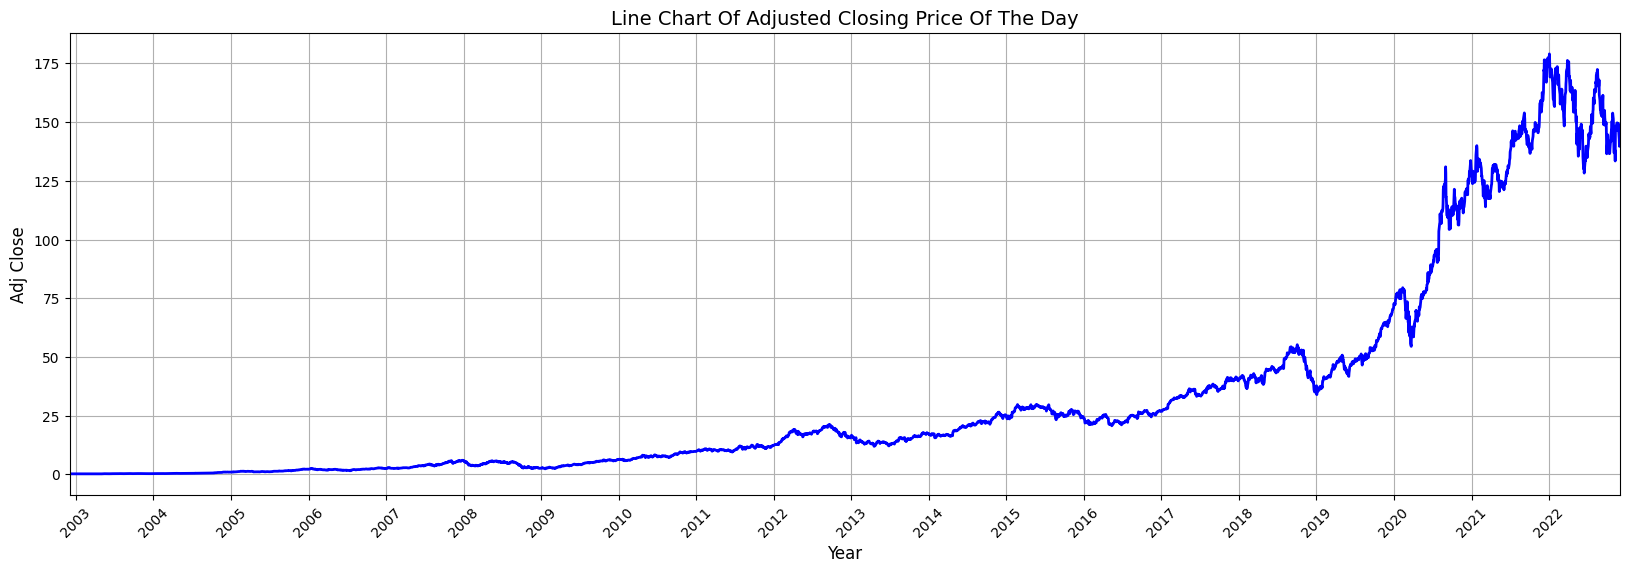

In [ ]:
#Print the first 50 rows of data from the "Adj Close" column
print(AAPL_data["Adj Close"].unique()[:50])

'''PLOT'''
#Change format of attribute "Adj Close"
AAPL_data['Date'] = pd.to_datetime(AAPL_data['Date'], format='%d/%m/%Y')

#Plot line chart
plt.figure(figsize=(20,6))
plt.plot(AAPL_data['Date'], AAPL_data['Adj Close'], linestyle='-', color='b', linewidth=2)

#Set label
plt.title('Line Chart Of Adjusted Closing Price Of The Day', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)

#Set limit for x
plt.xlim(AAPL_data['Date'].min(), AAPL_data['Date'].max())

#Adjust the display of the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  #Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  #Format by month

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

***Attribute "Volume"***

[398742400 227869600 325757600 243398400 245358400 236084800 308610400
 253500800 149340800 164780000 251624800 222661600 150701600 347519200
 318096800 125826400  39340000  85422400  80035200 155041600 200726400
 181428800 147453600 390532800 342344800 229644800 215252800 175100800
 178942400 186860800 371128800 559070400 266761600 253456000 215140800
 228256000 305468800 391406400 286255200 373044000 407058400 341224800
 264784800 317413600 221614400 179149600 269701600 167888000 228687200
 208493600]


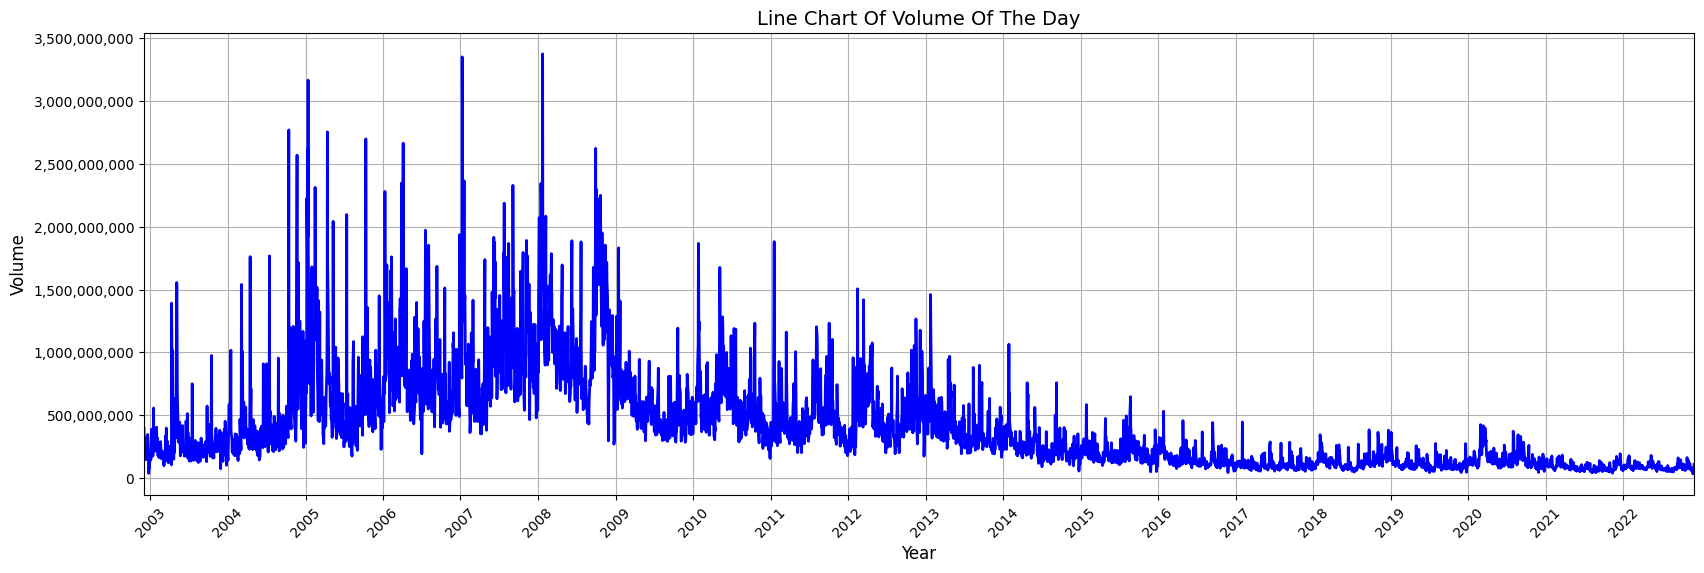

In [ ]:
#Print the first 50 rows of data from the "Volume" column
print(AAPL_data["Volume"].unique()[:50])

'''PLOT'''
#Change format of attribute "Volume"
AAPL_data['Date'] = pd.to_datetime(AAPL_data['Date'], format='%d/%m/%Y')

#Plot line chart
plt.figure(figsize=(20,6))
plt.plot(AAPL_data['Date'], AAPL_data['Volume'], linestyle='-', color='b', linewidth=2)

#Set label
plt.title('Line Chart Of Volume Of The Day', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Volume', fontsize=12)

#Set limit for x
plt.xlim(AAPL_data['Date'].min(), AAPL_data['Date'].max())

#Adjust the display of the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  #Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  #Format by month
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

**2. Dataset GDP**

---



***Attribute "Country"***

In [ ]:
#The number of countries
print("The number of countries or regions:", len(GDP['Country Name']))
print("Countries or regions:", GDP['Country Name'].unique())

The number of countries or regions: 266
Countries or regions: ['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Channel Islands' 'Chile' 'China' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czechia' 'Germany' 'Djibouti' 'Dominica'
 'Denmark' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pa

***Attribute "Year"***

In [ ]:
#Change format of dataset from wide-form to long-form
tmp = GDP.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], var_name="Year", value_name="GDP")
#Get minimum year and maximum year
min_year = tmp['Year'].min()
max_year = tmp['Year'].max()
#Calculate total year
total_years = len(tmp['Year'])
print(f"The time range in the dataset: from {min_year} to {max_year}")

The time range in the dataset: from 1960 to 2023


***Attribute "GDP"***

In [ ]:
GDP_Describe = tmp['GDP'].describe()
print(f"Mean of GDP:", GDP_Describe['mean'])
print(f"Maximum GDP:", GDP_Describe['max'])
print(f"Minimum GDP:", GDP_Describe['min'])

#Count the number of missing GDP
missing_GDP = tmp['GDP'].isna().sum()
print("The number of missing GDP", missing_GDP)

Mean of GDP: 1527696538358.9463
Maximum GDP: 92827100000000.0
Minimum GDP: 10098852.88
The number of missing GDP 3061


**3. Dataset CPI**

---



***Attribute "Year"***

In [ ]:
min_year_CPI = CPI['Year'].min()
max_year_CPI = CPI['Year'].max()
total_years_CPI = len(tmp['Year'])
print(f"The time range in the dataset CPI: from {min_year_CPI} to {max_year_CPI}")

The time range in the dataset CPI: from 2002 to 2022


***Attribute "Jan-Dec"***

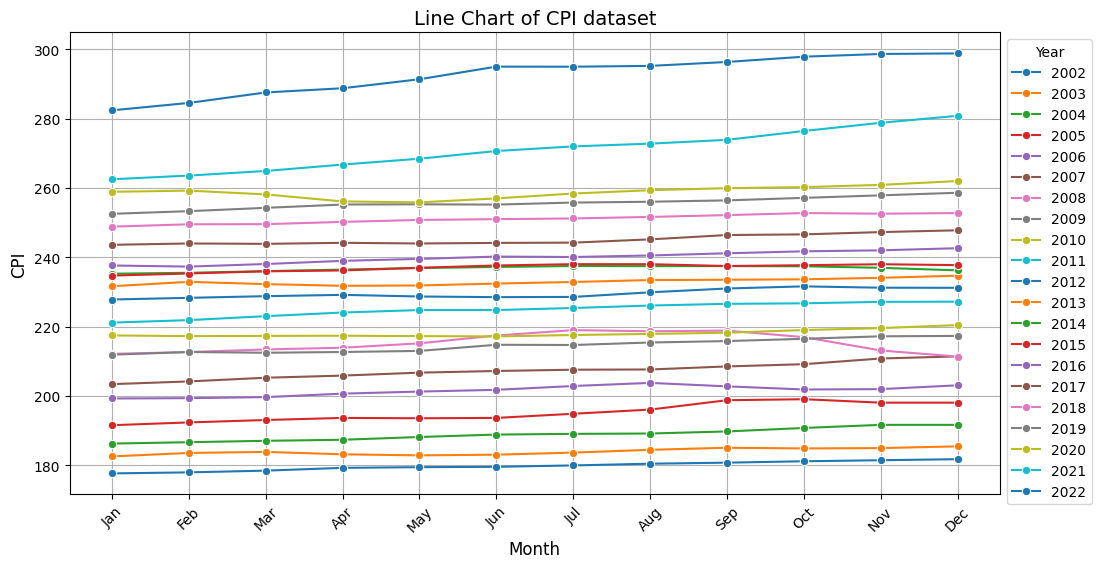

In [ ]:
tmp_CPI = CPI.melt(id_vars=["Year"], var_name="Month", value_name="CPI")

month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
tmp_CPI['Month'] = pd.Categorical(tmp_CPI['Month'], categories=month, ordered=True)

#Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=tmp_CPI, x="Month", y="CPI", hue="Year", marker="o", palette="tab10")

#Set label
plt.title('Line Chart of CPI dataset', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('CPI', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Year", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


# **Data Processing**

**1. Change Time Feature**

In [ ]:
AAPL_data['Month'] = AAPL_data['Date'].dt.month
AAPL_data['DayOfWeek'] = AAPL_data['Date'].dt.dayofweek
AAPL_data['Quarter'] = AAPL_data['Date'].dt.quarter
#Set format for decimal number
pd.set_option('display.float_format', '{:.10f}'.format)
print(AAPL_data.head())

        Date         Open         High          Low        Close    Adj Close  \
0 2002-12-02 0.2839289900 0.2874999940 0.2680360080 0.2710709870 0.2286611200   
1 2002-12-03 0.2714290020 0.2739290000 0.2696430090 0.2707140150 0.2283600570   
2 2002-12-04 0.2710709870 0.2712500100 0.2589290140 0.2673209910 0.2254979310   
3 2002-12-05 0.2683930100 0.2692860070 0.2594639960 0.2612499890 0.2203767000   
4 2002-12-06 0.2616069910 0.2712500100 0.2592859860 0.2669639890 0.2251967040   

      Volume  Month  DayOfWeek  Quarter  
0  398742400     12          0        4  
1  227869600     12          1        4  
2  325757600     12          2        4  
3  243398400     12          3        4  
4  245358400     12          4        4  


**2. RSI - Relative Strength Index**

In [ ]:
#Calculate the change in the closing price between two consecutive days
changing = AAPL_data['Close'].diff()
#Get gain and loss
gain = (changing.where(changing > 0, 0)).rolling(window=14).mean()
loss = (-changing.where(changing < 0, 0)).rolling(window=14).mean()
#Calculate RS
RS = gain / loss
AAPL_data['RSI'] = 100 - (100 / (1 + RS))
#Set format for decimal number
pd.set_option('display.float_format', '{:.10f}'.format)
print(AAPL_data[:15])

         Date         Open         High          Low        Close  \
0  2002-12-02 0.2839289900 0.2874999940 0.2680360080 0.2710709870   
1  2002-12-03 0.2714290020 0.2739290000 0.2696430090 0.2707140150   
2  2002-12-04 0.2710709870 0.2712500100 0.2589290140 0.2673209910   
3  2002-12-05 0.2683930100 0.2692860070 0.2594639960 0.2612499890   
4  2002-12-06 0.2616069910 0.2712500100 0.2592859860 0.2669639890   
5  2002-12-09 0.2667860090 0.2669639890 0.2619639930 0.2633930150   
6  2002-12-10 0.2633930150 0.2758930030 0.2630360130 0.2728570100   
7  2002-12-11 0.2732140120 0.2766070070 0.2692860070 0.2766070070   
8  2002-12-12 0.2769640090 0.2776789960 0.2680360080 0.2712500100   
9  2002-12-13 0.2703570130 0.2705360050 0.2616069910 0.2641069890   
10 2002-12-16 0.2644639910 0.2696430090 0.2608929870 0.2651790080   
11 2002-12-17 0.2651790080 0.2712500100 0.2617860140 0.2692860070   
12 2002-12-18 0.2642860110 0.2653569880 0.2589290140 0.2601790130   
13 2002-12-19 0.2594639960 0.26642

**3. Merge GDP into the AAPL dataset**

In [ ]:
#Get GDP of United States
GDP_US = tmp[tmp['Country Name'] == 'United States']

#Covert "Year" to integer
GDP_US['Year'] = GDP_US['Year'].astype(int)

#Remove unnecessary columns
GDP_US = GDP_US[['Year', 'GDP']]

#Get year from attribute "Date" in AAPL dataset
AAPL_data['Year'] = AAPL_data['Date'].dt.year

#Merge GDP into AAPL dataset
if 'GDP' in AAPL_data.columns:
    AAPL_data = AAPL_data.drop('GDP', axis=1)
AAPL_data = AAPL_data.merge(GDP_US, on='Year', how='left')
AAPL_data = AAPL_data.drop('Year', axis=1)

print(AAPL_data[:15])


         Date         Open         High          Low        Close  \
0  2002-12-02 0.2839289900 0.2874999940 0.2680360080 0.2710709870   
1  2002-12-03 0.2714290020 0.2739290000 0.2696430090 0.2707140150   
2  2002-12-04 0.2710709870 0.2712500100 0.2589290140 0.2673209910   
3  2002-12-05 0.2683930100 0.2692860070 0.2594639960 0.2612499890   
4  2002-12-06 0.2616069910 0.2712500100 0.2592859860 0.2669639890   
5  2002-12-09 0.2667860090 0.2669639890 0.2619639930 0.2633930150   
6  2002-12-10 0.2633930150 0.2758930030 0.2630360130 0.2728570100   
7  2002-12-11 0.2732140120 0.2766070070 0.2692860070 0.2766070070   
8  2002-12-12 0.2769640090 0.2776789960 0.2680360080 0.2712500100   
9  2002-12-13 0.2703570130 0.2705360050 0.2616069910 0.2641069890   
10 2002-12-16 0.2644639910 0.2696430090 0.2608929870 0.2651790080   
11 2002-12-17 0.2651790080 0.2712500100 0.2617860140 0.2692860070   
12 2002-12-18 0.2642860110 0.2653569880 0.2589290140 0.2601790130   
13 2002-12-19 0.2594639960 0.26642

<ipython-input-68-575c0b557375>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_US['Year'] = GDP_US['Year'].astype(int)


**4. Merge CPI into the AAPL dataset**

In [ ]:
#Conver month from string to integer
tmp_CPI['Month'] = tmp_CPI['Month'].apply(lambda x: pd.to_datetime(x, format='%b').month)
tmp_CPI = tmp_CPI.sort_values(by=['Year', 'Month']).reset_index(drop=True)

# Convert 'Year' và 'Month' to integer
tmp_CPI['Year'] = tmp_CPI['Year'].astype(int)
tmp_CPI['Month'] = tmp_CPI['Month'].astype(int)


#Get month and year from AAPL dataset
AAPL_data['Year'] = AAPL_data['Date'].dt.year
AAPL_data['Month'] = AAPL_data['Date'].dt.month

#Merge CPI into AAPL_data by month and year
AAPL_data = AAPL_data.merge(tmp_CPI, on=['Year', 'Month'], how='left')
AAPL_data = AAPL_data.drop(['Year', 'Month'], axis=1)

print(AAPL_data.head())

        Date         Open         High          Low        Close    Adj Close  \
0 2002-12-02 0.2839289900 0.2874999940 0.2680360080 0.2710709870 0.2286611200   
1 2002-12-03 0.2714290020 0.2739290000 0.2696430090 0.2707140150 0.2283600570   
2 2002-12-04 0.2710709870 0.2712500100 0.2589290140 0.2673209910 0.2254979310   
3 2002-12-05 0.2683930100 0.2692860070 0.2594639960 0.2612499890 0.2203767000   
4 2002-12-06 0.2616069910 0.2712500100 0.2592859860 0.2669639890 0.2251967040   

      Volume  DayOfWeek  Quarter  RSI                       GDP            CPI  
0  398742400          0        4  NaN 14084200000000.0000000000 181.8000000000  
1  227869600          1        4  NaN 14084200000000.0000000000 181.8000000000  
2  325757600          2        4  NaN 14084200000000.0000000000 181.8000000000  
3  243398400          3        4  NaN 14084200000000.0000000000 181.8000000000  
4  245358400          4        4  NaN 14084200000000.0000000000 181.8000000000  


**5. Handle missing values**

In [ ]:
#Statistics of the number of missing values for each column in the dataset
check_missing_val = AAPL_data.isnull().sum()
print("Statistics of the number of missing values for each column in the dataset")
print(check_missing_val)

Statistics of the number of missing values for each column in the dataset
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
DayOfWeek     0
Quarter       0
RSI          13
GDP           0
CPI           0
dtype: int64


In [ ]:
#Replace missing values (NaN) with the mean value of each column
AAPL_data = AAPL_data.fillna(AAPL_data.mean())
check_missing_val_after_handling = AAPL_data.isnull().sum()
print("Statistics of the number of missing values for each column in the dataset after handling")
print(check_missing_val_after_handling)

Statistics of the number of missing values for each column in the dataset after handling
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
DayOfWeek    0
Quarter      0
RSI          0
GDP          0
CPI          0
dtype: int64


**6. Split "Date" to date column, month column, and year column**

In [ ]:
if 'Date' in AAPL_data.columns:
  AAPL_data['Year'] = AAPL_data['Date'].dt.year
  AAPL_data['Month'] = AAPL_data['Date'].dt.month
  AAPL_data['Day'] = AAPL_data['Date'].dt.day

  AAPL_data.drop(columns=['Date'], inplace=True)
print(AAPL_data.head())

          Open         High          Low        Close    Adj Close     Volume  \
0 0.2839289900 0.2874999940 0.2680360080 0.2710709870 0.2286611200  398742400   
1 0.2714290020 0.2739290000 0.2696430090 0.2707140150 0.2283600570  227869600   
2 0.2710709870 0.2712500100 0.2589290140 0.2673209910 0.2254979310  325757600   
3 0.2683930100 0.2692860070 0.2594639960 0.2612499890 0.2203767000  243398400   
4 0.2616069910 0.2712500100 0.2592859860 0.2669639890 0.2251967040  245358400   

   DayOfWeek  Quarter           RSI                       GDP            CPI  \
0          0        4 56.1356808705 14084200000000.0000000000 181.8000000000   
1          1        4 56.1356808705 14084200000000.0000000000 181.8000000000   
2          2        4 56.1356808705 14084200000000.0000000000 181.8000000000   
3          3        4 56.1356808705 14084200000000.0000000000 181.8000000000   
4          4        4 56.1356808705 14084200000000.0000000000 181.8000000000   

   Year  Month  Day  
0  2002   

**7. Data normalization**

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

AAPL_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'RSI', 'GDP', 'CPI']] = scaler.fit_transform(AAPL_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'RSI', 'GDP', 'CPI']])

print(AAPL_data.head())

          Open         High          Low        Close    Adj Close  \
0 0.0002848988 0.0002844156 0.0002285894 0.0002023647 0.0001734681   
1 0.0002163674 0.0002101372 0.0002375724 0.0002004009 0.0001717850   
2 0.0002144046 0.0001954742 0.0001776818 0.0001817349 0.0001557847   
3 0.0001997226 0.0001847246 0.0001806723 0.0001483366 0.0001271551   
4 0.0001625181 0.0001954742 0.0001796773 0.0001797710 0.0001541007   

        Volume  DayOfWeek  Quarter          RSI          GDP          CPI  \
0 0.1089188581          0        4 0.5594580043 0.0000000000 0.0000000000   
1 0.0577252137          1        4 0.5594580043 0.0000000000 0.0000000000   
2 0.0870525464          2        4 0.5594580043 0.0000000000 0.0000000000   
3 0.0623776561          3        4 0.5594580043 0.0000000000 0.0000000000   
4 0.0629648739          4        4 0.5594580043 0.0000000000 0.0000000000   

   Year  Month  Day  
0  2002     12    2  
1  2002     12    3  
2  2002     12    4  
3  2002     12    5  
4  200

# **Split the data into training set and evaluation set**

In [ ]:
X = AAPL_data.drop(columns=['Open'])
y = AAPL_data['Open']

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Size of training set and evaluation set
print("Size of dataset AAPL:", AAPL_data.shape)
print("Size of training dataset X:", X_train.shape)
print("Size of evaluation dataset X:", X_test.shape)
print("Size of training dataset y:", y_train.shape)
print("Size of evaluation dataset y:", y_test.shape)

Size of dataset AAPL: (5035, 14)
Size of training dataset X: (4028, 13)
Size of evaluation dataset X: (1007, 13)
Size of training dataset y: (4028,)
Size of evaluation dataset y: (1007,)


# **Feedforward Neural Network (FNN)**

**Model**

Epoch 1/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 209.4762 - mae: 7.6675 - val_loss: 0.0940 - val_mae: 0.2506
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0908 - mae: 0.2305 - val_loss: 0.0779 - val_mae: 0.2022
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0787 - mae: 0.2106 - val_loss: 0.0689 - val_mae: 0.1893
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0743 - mae: 0.2042 - val_loss: 0.0727 - val_mae: 0.1822
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0645 - mae: 0.1896 - val_loss: 0.0604 - val_mae: 0.1612
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0553 - mae: 0.1702 - val_loss: 0.0555 - val_mae: 0.1504
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0476 - mae: 0.1617 - val_loss: 0.0460 - val_mae: 0.1332
Epoch 8/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0380 - mae: 0.1404 - val_loss: 0.0361 - val_mae: 0.1155
Epoch 9/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4m

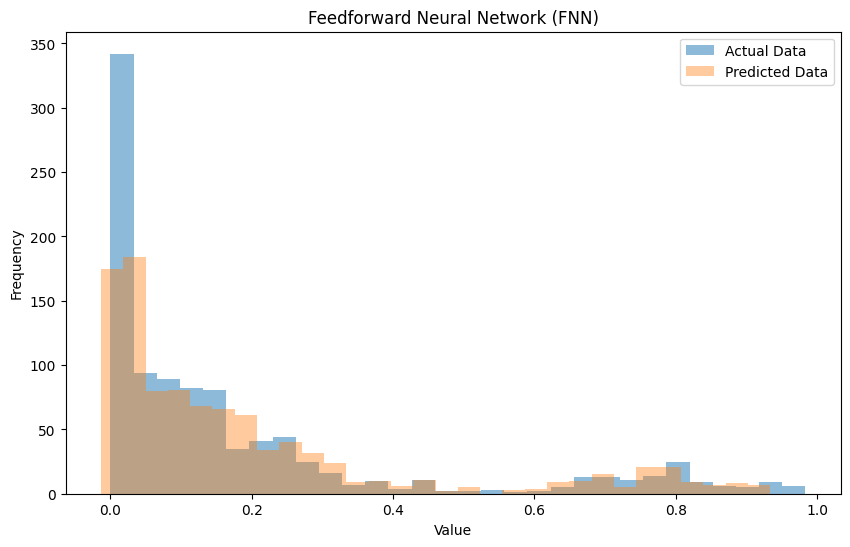

Mean Squared Error: 0.00037480097929851603


In [ ]:
#Initialize model
model_FNN = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])

#Compile model
model_FNN.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

#Training model
FNN_train = model_FNN.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

#Model evaluation
loss_FNN, mae_FNN = model_FNN.evaluate(X_test, y_test, verbose=1)
print("Mean Squared Error (MSE) on Test Set:", loss_FNN)
print("Mean Absolute Error (MAE) on Test Set:", mae_FNN)

#Prediction
y_pred_FNN = model_FNN.predict(X_test)

#Plot
plt.figure(figsize=(10, 6))

plt.hist(y_test, bins=30, alpha=0.5, label='Actual Data')

plt.hist(y_pred_FNN, bins=30, alpha=0.4, label='Predicted Data')

plt.title('Feedforward Neural Network (FNN)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.show()
# plt.figure(figsize=(12, 6))
# plt.plot(y_test, label="Actual", color='blue', linestyle='--', alpha=0.7)
# plt.plot(y_pred_FNN, label="Predicted", color='red', linestyle='-', alpha=0.7)

# plt.title("Predicted vs Actual Stock Prices (Open)", fontsize=16)
# plt.xlabel("Time", fontsize=14)
# plt.ylabel("Price", fontsize=14)
# plt.legend()

# plt.show()

#Model evaluation
FNN_mse = mean_squared_error(y_test, y_pred_FNN)
print("Mean Squared Error:", FNN_mse)


**Check Overfitting FNN**

In [ ]:
y_train_pred_FNN = model_FNN.predict(X_train)
y_test_pred_FNN = model_FNN.predict(X_test)
#MSE training set
mse_train_FNN = mean_squared_error(y_train, y_train_pred_FNN)
#MSE validation set
mse_test_FNN = mean_squared_error(y_test, y_test_pred_FNN)
print("MSE training set:", mse_train_FNN)
print("MSE validation set:", mse_test_FNN)

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE training set: 0.0003944070069605195
MSE validation set: 0.00037480097929851603


# **Recurrent Neural Network (RNN)**

**Create Sequence Data for RNN model**

In [ ]:
def create_sequences(data, labels, day_before):
    X, y = [], []
    data = data.values if isinstance(data, pd.DataFrame) else data
    labels = labels.values if isinstance(labels, pd.Series) else labels
    for i in range(len(data) - day_before):
        X.append(data[i:i + day_before])
        y.append(labels[i + day_before])
    return np.array(X), np.array(y)

day_before = 1

#Create sequences
X_train_RNN, y_train_RNN = create_sequences(X_train, y_train, day_before)
X_test_RNN, y_test_RNN = create_sequences(X_test, y_test, day_before)

print("Size of training dataset X:", X_train_RNN.shape)
print("Size of evaluation dataset X:", X_test_RNN.shape)


Size of training dataset X: (4027, 1, 13)
Size of evaluation dataset X: (1006, 1, 13)


**Model**

Epoch 1/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.6334 - mae: 0.1751 - val_loss: 0.0831 - val_mae: 0.1683
Epoch 2/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0700 - mae: 0.1699 - val_loss: 0.0630 - val_mae: 0.1814
Epoch 3/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0640 - mae: 0.1789 - val_loss: 0.0624 - val_mae: 0.1634
Epoch 4/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0585 - mae: 0.1698 - val_loss: 0.0605 - val_mae: 0.1734
Epoch 5/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0571 - mae: 0.1681 - val_loss: 0.0607 - val_mae: 0.1856
Epoch 6/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0588 - mae: 0.1724 - val_loss: 0.0616 - val_mae: 0.1635
Epoch 7/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0576 - mae: 0.1675 - val_loss: 0.0609 - val_mae: 0.1692
Epoch 8/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0591 - mae: 0.1728 - val_loss: 0.0616 - val_mae: 0.1910
Epoch 9/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

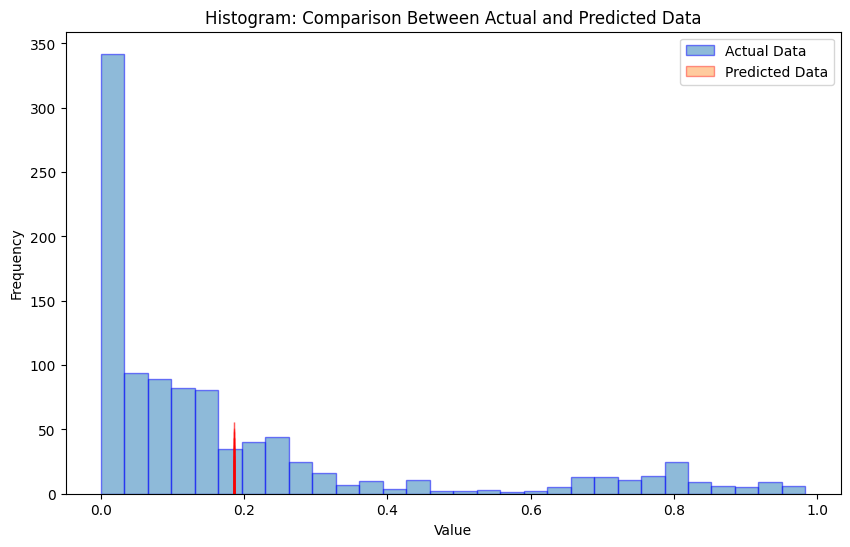

Mean Squared Error: 0.059973421634547885


In [ ]:
#Initialize model
model_RNN = Sequential([
    Input(shape=(X_train_RNN.shape[1], X_train_RNN.shape[2])),
    LSTM(units=64, return_sequences=True, activation="tanh", kernel_regularizer=l2(0.01)),
    LSTM(units=32, return_sequences=True, activation="tanh", kernel_regularizer=l2(0.01)),
    Dense(1, activation="linear"),
])

#Compile model
model_RNN.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

#Training model
RNN_train = model_RNN.fit(X_train_RNN, y_train_RNN, validation_data=(X_test_RNN, y_test_RNN), epochs=50, batch_size=20, verbose=1)

#Model evaluation
loss_RNN, mae_RNN = model_RNN.evaluate(X_test_RNN, y_test_RNN)
print("Mean Squared Error (MSE) on Test Set:", loss_RNN)
print("Mean Absolute Error (MAE) on Test Set:", mae_RNN)

# Prediction
y_pred_RNN = model_RNN.predict(X_test_RNN)

# Lấy bước thời gian cuối cùng
y_pred_RNN = y_pred_RNN[:, -1, :]

# Đảm bảo y_test_RNN có cùng kích thước
y_test_RNN = y_test_RNN.reshape(-1, 1)

#Plot
plt.figure(figsize=(10, 6))

plt.hist(y_test_RNN, bins=30, alpha=0.5, label='Actual Data', edgecolor='blue')
plt.hist(y_pred_RNN, bins=30, alpha=0.4, label='Predicted Data', edgecolor='red')

plt.title('Histogram: Comparison Between Actual and Predicted Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.show()

# Model evaluation
RNN_mse = mean_squared_error(y_test_RNN, y_pred_RNN)
print("Mean Squared Error:", RNN_mse)


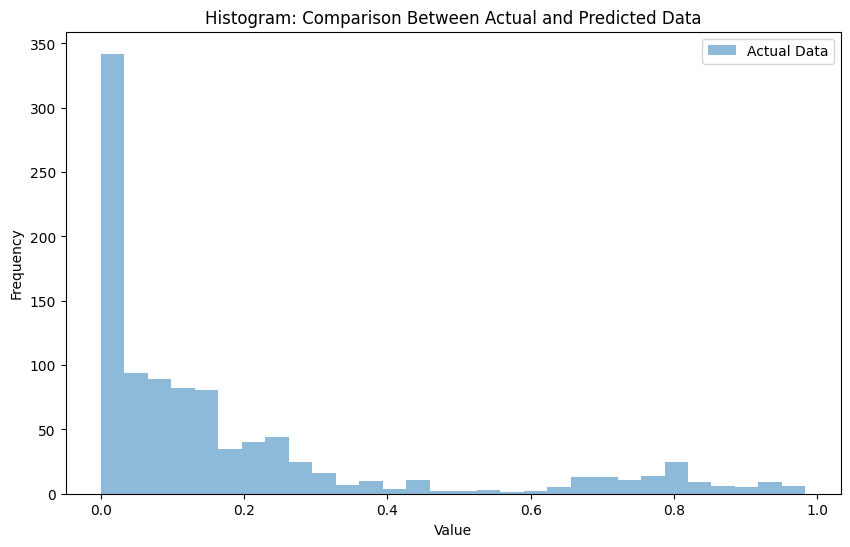

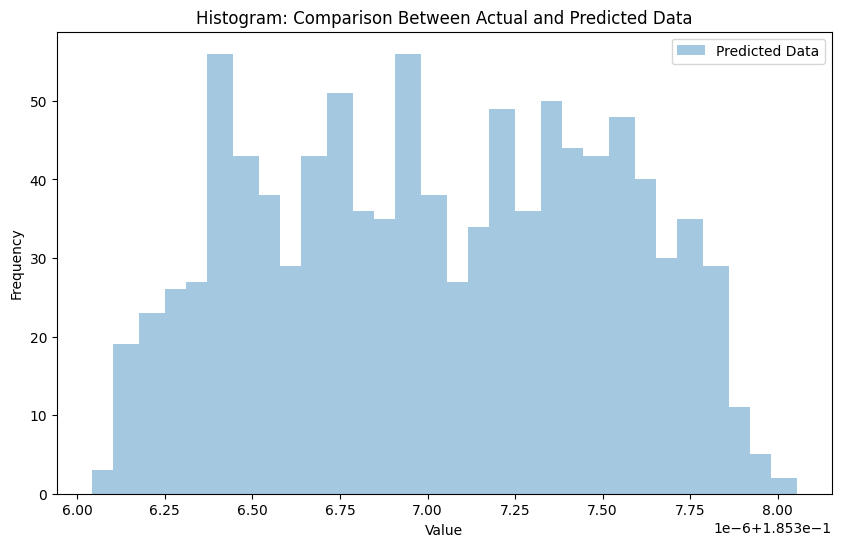

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(y_test_RNN, bins=30, alpha=0.5, label='Actual Data')

plt.title('Histogram: Comparison Between Actual and Predicted Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.show()
plt.figure(figsize=(10, 6))

plt.hist(y_pred_RNN, bins=30, alpha=0.4, label='Predicted Data')

plt.title('Histogram: Comparison Between Actual and Predicted Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.show()

**Check overfitting**

In [ ]:
y_train_pred_RNN = model_RNN.predict(X_train_RNN)
y_test_pred_RNN = model_RNN.predict(X_test_RNN)
y_train_pred_RNN = y_train_pred_RNN.reshape(-1)
y_test_pred_RNN = y_test_pred_RNN.reshape(-1)
#MSE training set
mse_train_RNN = mean_squared_error(y_train_RNN, y_train_pred_RNN)
#MSE validation set
mse_test_RNN = mean_squared_error(y_test_RNN, y_test_pred_RNN)
print("MSE training set:", mse_train_RNN)
print("MSE validation set:", mse_test_RNN)

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MSE training set: 0.05828076328954045
MSE validation set: 0.059973421634547885


# **Linear Regression**

**Model**

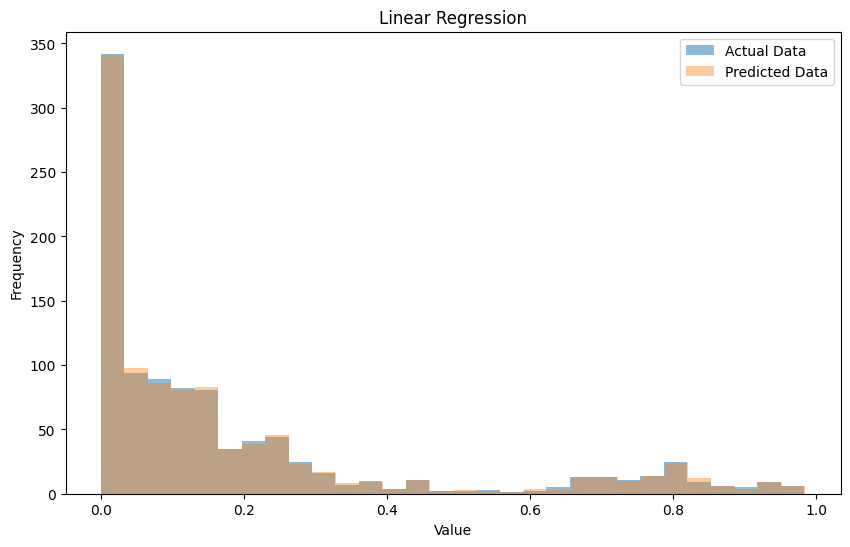

Mean Squared Error: 3.474936428073387e-06


In [ ]:
#Initialize model
lr_model = LinearRegression()

#Training model
lr_model.fit(X_train, y_train)

#Prediction
y_pred_lr = lr_model.predict(X_test)

#Plot
plt.figure(figsize=(10, 6))

plt.hist(y_test, bins=30, alpha=0.5, label='Actual Data')

plt.hist(y_pred_lr, bins=30, alpha=0.4, label='Predicted Data')

plt.title('Linear Regression')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.show()

#Model evaluation
lr_mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error:", lr_mse)

**Check overfitting**

In [ ]:
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)
#MSE training set
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
#MSE validation set
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
print("MSE training set:", mse_train_lr)
print("MSE validation set:", mse_test_lr)

MSE training set: 4.318767480239973e-06
MSE validation set: 3.474936428073387e-06


# **Support Vector Machine (SVM)**

**Model**

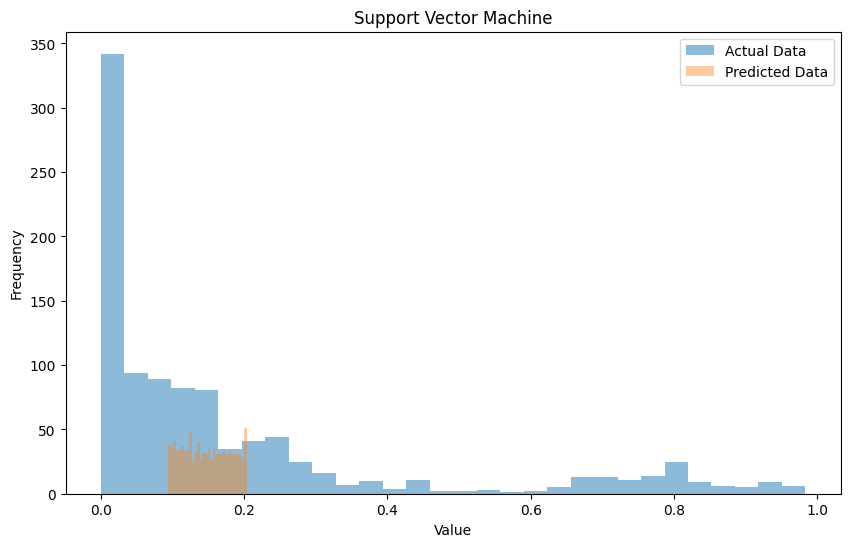

Mean Squared Error: 0.049000406065822254


In [ ]:
#Initialize model
svm_model = SVR(kernel='rbf', C=1.0, gamma='scale')

#Training model
svm_model.fit(X_train, y_train)

#Prediction
y_pred_svm = svm_model.predict(X_test)

#Plot
plt.figure(figsize=(10, 6))

plt.hist(y_test, bins=30, alpha=0.5, label='Actual Data')

plt.hist(y_pred_svm, bins=30, alpha=0.4, label='Predicted Data')

plt.title('Support Vector Machine')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.show()

#Model evaluation
svm_mse = mean_squared_error(y_test, y_pred_svm)
print("Mean Squared Error:", svm_mse)

**Check overfitting**

In [ ]:
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)
#MSE training set
mse_train_svm = mean_squared_error(y_train, y_train_pred_svm)
#MSE validation set
mse_test_svm = mean_squared_error(y_test, y_test_pred_svm)
print("MSE training set:", mse_train_svm)
print("MSE validation set:", mse_test_svm)

MSE training set: 0.048010973534925054
MSE validation set: 0.049000406065822254


# **Decision Tree**

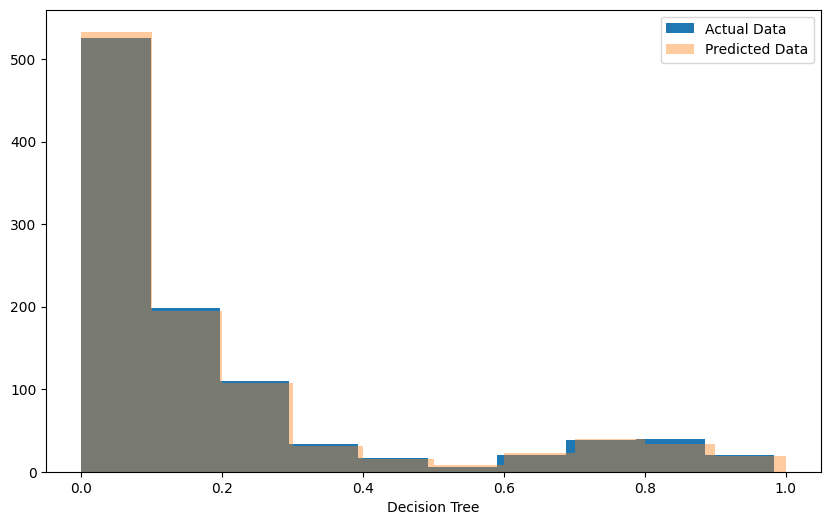

Mean Squared Error: 2.0261176066380674e-05


In [ ]:
#Initialize model
dtr_model = DecisionTreeRegressor()

#Training model
dtr_model.fit(X_train, y_train)

#Prediction
y_pred_dtr = dtr_model.predict(X_test)

#Plot
plt.figure(figsize=(10, 6))
plt.hist(y_test.values, label='Actual Data')
plt.hist(y_pred_dtr, label='Predicted Data', alpha=0.4)
plt.xlabel('Decision Tree')
plt.legend()
plt.show()

#Model evaluation
dtr_mse = mean_squared_error(y_test, y_pred_dtr)
print("Mean Squared Error:", dtr_mse)

**Check overfitting**

In [ ]:
y_train_pred_dtr = dtr_model.predict(X_train)
y_test_pred_dtr = dtr_model.predict(X_test)
#MSE training set
mse_train_dtr = mean_squared_error(y_train, y_train_pred_dtr)
#MSE validation set
mse_test_dtr = mean_squared_error(y_test, y_test_pred_dtr)
print("MSE training set:", mse_train_dtr)
print("MSE validation set:", mse_test_dtr)

MSE training set: 5.737713997257219e-37
MSE validation set: 2.0261176066380674e-05


**Fix overfitting**

In [ ]:
#Set depth
decision_tree = DecisionTreeRegressor(max_depth=5, random_state=42)

#Training model
decision_tree.fit(X_train, y_train)

#Prediction
y_train_pred_dtr = decision_tree.predict(X_train)
y_test_pred_dtr = decision_tree.predict(X_test)

#MSE
train_mse_dtr = mean_squared_error(y_train, y_train_pred_dtr)
test_mse_dtr = mean_squared_error(y_test, y_test_pred_dtr)

print("MSE training set:", train_mse_dtr)
print("MSE validation set:", test_mse_dtr)

MSE training set: 5.0752578558121955e-05
MSE validation set: 6.357623571503903e-05


# **Random Forest**

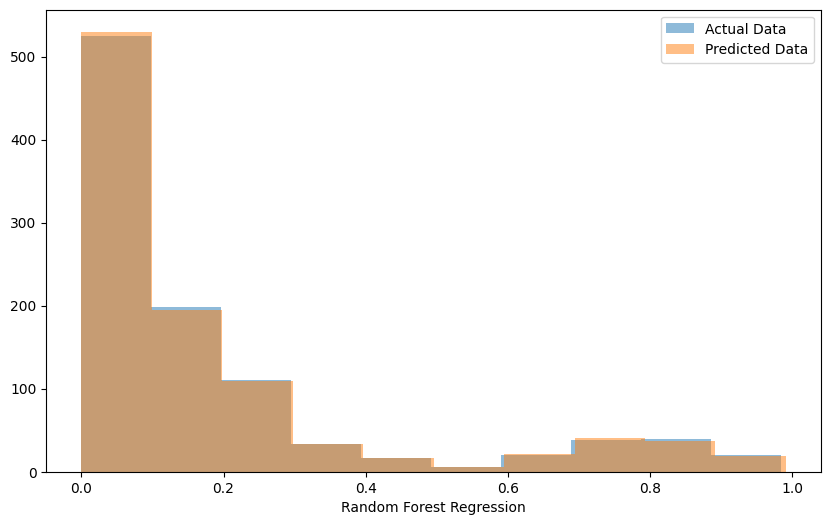

Mean Squared Error: 1.0455675345466838e-05


In [ ]:
#Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#Training model
rf_model.fit(X_train, y_train)

#Prediction
y_pred_rf = rf_model.predict(X_test)

#Plot
plt.figure(figsize=(10, 6))
plt.hist(y_test.values, label='Actual Data', alpha=0.5)
plt.hist(y_pred_rf, label='Predicted Data', alpha=0.5)
plt.xlabel('Random Forest Regression')
plt.legend()
plt.show()

#Model evaluation
rf_mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", rf_mse)

**Check overfitting**

In [ ]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
#MSE training set
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
#MSE validation set
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
print("MSE training set:", mse_train_rf)
print("MSE validation set:", mse_test_rf)

MSE training set: 1.2224518155450136e-06
MSE validation set: 1.0455675345466838e-05


**Fix ovefitting**

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5,
                                     min_samples_split=10, min_samples_leaf=5,
                                     max_features='sqrt', random_state=42)

#Training model
rf_regressor.fit(X_train, y_train)

#Prediction
y_train_pred_rf = rf_regressor.predict(X_train)
y_test_pred_rf = rf_regressor.predict(X_test)

#MSE
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

print("MSE training set:", train_mse_rf)
print("MSE validation set:", test_mse_rf)

MSE training set: 3.9066574010411795e-05
MSE validation set: 4.7255257846156326e-05


# **Evaluation**

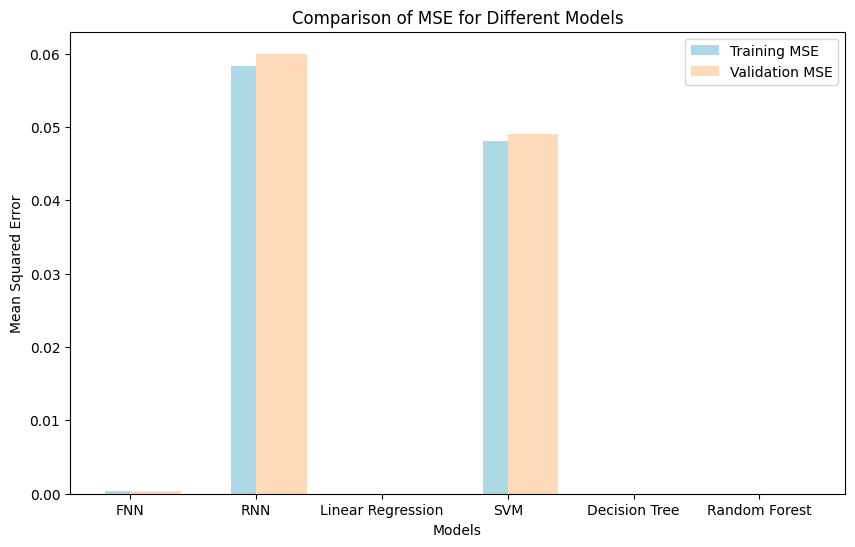

FNN - Training MSE: 0.0003944070069605195, Validation MSE: 0.00037480097929851603
RNN - Training MSE: 0.05828076328954045, Validation MSE: 0.059973421634547885
Linear Regression - Training MSE: 4.318767480239973e-06, Validation MSE: 3.474936428073387e-06
SVM - Training MSE: 0.048010973534925054, Validation MSE: 0.049000406065822254
Decision Tree - Training MSE: 5.737713997257219e-37, Validation MSE: 2.0261176066380674e-05
Random Forest - Training MSE: 1.0455675345466838e-05, Validation MSE: 1.0455675345466838e-05


In [ ]:
train_mse = [mse_train_FNN, mse_train_RNN, mse_train_lr, mse_train_svm, mse_train_dtr, mse_test_rf]
test_mse = [mse_test_FNN, mse_test_RNN, mse_test_lr, mse_test_svm, mse_test_dtr, mse_test_rf]
model_names = ['FNN', 'RNN', 'Linear Regression', 'SVM', 'Decision Tree', 'Random Forest']
x = range(len(model_names))

plt.figure(figsize=(10, 6))
plt.bar(x, train_mse, width=0.4, label='Training MSE', color='lightblue', align='center')
plt.bar(x, test_mse, width=0.4, label='Validation MSE', color='peachpuff', align='edge')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE for Different Models')
plt.xticks(x, model_names)
plt.legend()
plt.show()
for name, train, test in zip(model_names, train_mse, test_mse):
    print(f"{name} - Training MSE: {train}, Validation MSE: {test}")